<a href="https://colab.research.google.com/github/Titaniaurera/deteksifraud/blob/main/Identifikasi%20emosi%20melalui%20audio%20dengan%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preparation**

In [ ]:
!pip install -q kaggle


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "audio emotion"


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d 'uwrfkaggler/ravdess-emotional-speech-audio'
!kaggle datasets download -d 'ejlok1/surrey-audiovisual-expressed-emotion-savee'
!kaggle datasets download -d 'ejlok1/toronto-emotional-speech-set-tess'
!kaggle datasets download -d 'ejlok1/cremad'

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 97% 416M/429M [00:02<00:00, 219MB/s]
100% 429M/429M [00:02<00:00, 212MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
 98% 105M/107M [00:01<00:00, 115MB/s]  
100% 107M/107M [00:01<00:00, 106MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 417M/428M [00:02<00:00, 201MB/s]
100% 428M/428M [00:02<00:00, 171MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
100% 450M/451M [00:06<00:00, 74.9MB/s]
100% 451M/451M [00:06<00:00, 75.5MB/s]


In [ ]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import zipfile

# Ganti dengan path lengkap ke file ZIP Anda
zip_file = 'surrey-audiovisual-expressed-emotion-savee.zip'

# Tentukan lokasi untuk menyimpan hasil ekstrak
extract_location = 'SAVEE'

# Buka file ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Ekstrak semua isi ZIP ke lokasi yang ditentukan
    zip_ref.extractall(extract_location)

print("File ZIP telah berhasil diekstrak ke:", extract_location)

File ZIP telah berhasil diekstrak ke: SAVEE


In [ ]:
SAVEE = "/content/SAVEE/ALL"

# Run one example
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['KL_d06.wav', 'JE_d06.wav', 'DC_h03.wav', 'KL_h12.wav', 'KL_n23.wav']

In [ ]:
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error')
    path.append(SAVEE + i)

# Now check out the label count distribution
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

,count
labels,
male_neutral,120
male_disgust,60
male_happy,60
male_surprise,60
male_angry,60
male_fear,60
male_sad,60


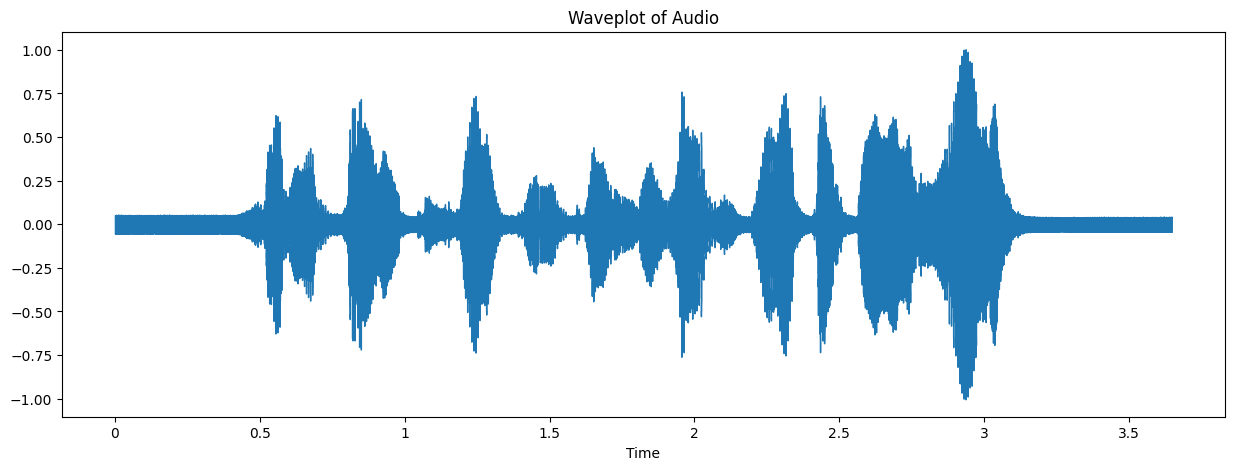

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Pilih contoh file audio
example_file = os.path.join(SAVEE, 'DC_a01.wav')  # Sesuaikan nama file yang ada di direktori

try:
    # Memuat file audio
    data, sampling_rate = librosa.load(example_file)

    # Plot waveform
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title('Waveplot of Audio')
    plt.show()

    # Putar audio
    ipd.display(ipd.Audio(example_file))
except FileNotFoundError:
    print(f"File not found: {example_file}")
except Exception as e:
    print(f"An error occurred: {e}")


**RAVDESS Dataset**

In [ ]:
import zipfile

# Ganti dengan path lengkap ke file ZIP Anda
zip_file = '/content/ravdess-emotional-speech-audio.zip'

# Tentukan lokasi untuk menyimpan hasil ekstrak
extract_location = 'RAV'

# Buka file ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Ekstrak semua isi ZIP ke lokasi yang ditentukan
    zip_ref.extractall(extract_location)

print("File ZIP telah berhasil diekstrak ke:", extract_location)

File ZIP telah berhasil diekstrak ke: RAV


In [ ]:
SAVEE = "/content/RAV"

# Run one example
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['Actor_01', 'Actor_19', 'Actor_07', 'Actor_04', 'Actor_08']

In [ ]:
import os
import pandas as pd

RAV = "/content/RAV"

dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []

for i in dir_list:
    try:
        fname = os.listdir(os.path.join(RAV, i))
        for f in fname:
            part = f.split('.')[0].split('-')
            if len(part) >= 7:  # Ensure enough parts in the filename
                emotion.append(int(part[2]))
                temp = int(part[6])
                gender.append("female" if temp % 2 == 0 else "male")
                path.append(os.path.join(RAV, i, f))
            else:
                print(f"Warning: Invalid filename format: {f}")
    except FileNotFoundError:
        print(f"Error: File not found for {os.path.join(RAV, i)}")

RAV_df = pd.DataFrame(emotion, columns=['emotion'])
RAV_df['gender'] = gender
RAV_df['labels'] = RAV_df['gender'] + '_' + RAV_df['emotion'].replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'})
RAV_df['source'] = 'RAVDESS'
RAV_df['path'] = path

RAV_df.labels.value_counts()

,count
labels,
male_neutral,144
female_neutral,144
male_surprise,96
male_angry,96
male_happy,96
male_fear,96
male_sad,96
male_disgust,96
female_disgust,96


In [ ]:
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

# ... kode Anda yang lain ...

# Pilih contoh file audio secara interaktif (contoh menggunakan ipywidgets)
from ipywidgets import interact, fixed

def play_audio(file_path):
    try:
        # Memuat file audio
        data, sr = librosa.load(file_path)

        # Plot waveform
        plt.figure(figsize=(15, 5))
        librosa.display.waveshow(data, sr=sampling_rate)
        plt.title('Waveplot of Audio')
        plt.show()

        # Putar audio
        display(ipd.Audio(data=data, rate=sr))  # Menggunakan data audio langsung

    except FileNotFoundError:
        print(f"File tidak ditemukan: {file_path}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Daftar file audio (sesuaikan dengan direktori Anda)
audio_files = [os.path.join(SAVEE, 'Actor_14', f) for f in os.listdir(os.path.join(SAVEE, 'Actor_14')) if f.endswith('.wav')]

# Interaktif memilih file
interact(play_audio, file_path=audio_files)

interactive(children=(Dropdown(description='file_path', options=('/content/RAV/Actor_14/03-01-06-02-02-01-14.w…

<function __main__.play_audio(file_path)>

**TESS Dataset**

In [ ]:
import zipfile

# Ganti dengan path lengkap ke file ZIP Anda
zip_file = '/content/toronto-emotional-speech-set-tess.zip'

# Tentukan lokasi untuk menyimpan hasil ekstrak
extract_location = 'TESS'

# Buka file ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Ekstrak semua isi ZIP ke lokasi yang ditentukan
    zip_ref.extractall(extract_location)

print("File ZIP telah berhasil diekstrak ke:", extract_location)

File ZIP telah berhasil diekstrak ke: TESS


In [ ]:
TESS = "/content/TESS/TESS Toronto emotional speech set data"

# Run one example
dir_list = os.listdir(TESS)
dir_list[0:9]

['OAF_disgust',
 'YAF_happy',
 'OAF_happy',
 'OAF_Sad',
 'OAF_Pleasant_surprise',
 'OAF_neutral',
 'YAF_disgust',
 'YAF_neutral',
 'YAF_angry']

In [ ]:
import os
import pandas as pd
import re

TESS = "/content/TESS/TESS Toronto emotional speech set data"

def extract_emotions(directory):
    emotions = []
    paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                # Extract emotion using regular expression
                emotion = re.search(r"(\w+)_(\w+)\.wav", file).group(2)
                emotions.append(emotion)
                paths.append(os.path.join(root, file))
    return emotions, paths

emotions, paths = extract_emotions(TESS)

TESS_df = pd.DataFrame({'labels': emotions, 'path': paths})
TESS_df['source'] = 'TESS'

# Map emotions to a more consistent format
emotion_mapping = {
    'angry': 'female_angry',
    'disgust': 'female_disgust',
    'fear': 'female_fear',
    'happy': 'female_happy',
    'neutral': 'female_neutral',
    'pleasant_surprise': 'female_surprise',
    'sad': 'female_sad'
}
TESS_df['labels'] = TESS_df['labels'].map(emotion_mapping)

TESS_df.labels.value_counts()

,count
labels,
female_disgust,400
female_happy,400
female_sad,400
female_neutral,400
female_angry,400
female_fear,400


In [ ]:
# Pilih contoh file audio secara interaktif (contoh menggunakan ipywidgets)
from ipywidgets import interact, fixed

def play_audio(file_path):
    try:
        # Memuat file audio
        data, sr = librosa.load(file_path)

        # Plot waveform
        plt.figure(figsize=(15, 5))
        librosa.display.waveshow(data, sr=sampling_rate)
        plt.title('Waveplot of Audio')
        plt.show()

        # Putar audio
        display(ipd.Audio(data=data, rate=sr))  # Menggunakan data audio langsung

    except FileNotFoundError:
        print(f"File tidak ditemukan: {file_path}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Daftar file audio (sesuaikan dengan direktori Anda)
audio_files = [os.path.join(TESS, '/content/TESS/TESS Toronto emotional speech set data/OAF_disgust', f) for f in os.listdir(os.path.join(TESS, '/content/TESS/TESS Toronto emotional speech set data/OAF_disgust')) if f.endswith('.wav')]

# Interaktif memilih file
interact(play_audio, file_path=audio_files)

interactive(children=(Dropdown(description='file_path', options=('/content/TESS/TESS Toronto emotional speech …

<function __main__.play_audio(file_path)>

CCREMAD Dataset

In [ ]:
import zipfile

# Ganti dengan path lengkap ke file ZIP Anda
zip_file = '/content/cremad.zip'

# Tentukan lokasi untuk menyimpan hasil ekstrak
extract_location = 'CREMAD'

# Buka file ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Ekstrak semua isi ZIP ke lokasi yang ditentukan
    zip_ref.extractall(extract_location)

print("File ZIP telah berhasil diekstrak ke:", extract_location)

File ZIP telah berhasil diekstrak ke: CREMAD


In [ ]:
CREMAD = "/content/CREMAD/AudioWAV"

# Run one example
dir_list = os.listdir(CREMAD)
dir_list[0:10]

['1039_TSI_DIS_XX.wav',
 '1086_IEO_NEU_XX.wav',
 '1027_WSI_FEA_XX.wav',
 '1056_IEO_DIS_MD.wav',
 '1051_TIE_NEU_XX.wav',
 '1002_WSI_FEA_XX.wav',
 '1019_IOM_NEU_XX.wav',
 '1051_IOM_HAP_XX.wav',
 '1003_IWL_NEU_XX.wav',
 '1043_WSI_ANG_XX.wav']

In [ ]:
REMAD = "/content/CREMAD/AudioWAV"

# Run one example
dir_list = os.listdir(REMAD)
dir_list[0:10]
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list:
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(REMAD + i)  # Replace CREMA with REMAD
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

,count
labels,
male_disgust,671
male_fear,671
male_happy,671
male_angry,671
male_sad,671
female_disgust,600
female_fear,600
female_angry,600
female_happy,600


In [ ]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

labels
female_disgust     1096
female_happy       1096
female_sad         1096
female_angry       1096
female_fear        1096
female_neutral     1056
male_neutral        839
male_disgust        827
male_happy          827
male_angry          827
male_fear           827
male_sad            827
male_surprise       156
female_surprise      96
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv('Data_path.csv')

# Fungsi untuk menambahkan garis miring setelah "ALL" hanya untuk path dari SAVEE
def fix_path(row):
    path = row['path']
    # Cek jika path berasal dari SAVEE dan ada '/ALL' di dalam path
    if 'SAVEE' in path and '/ALL' in path and not path[path.find('/ALL') + 4] == '/':
        # Menambahkan garis miring setelah 'ALL'
        path = path[:path.find('/ALL') + 4] + '/' + path[path.find('/ALL') + 4:]
    return path

# Terapkan fungsi untuk memperbaiki path hanya untuk SAVEE
df['path'] = df.apply(fix_path, axis=1)

# Simpan DataFrame yang telah diperbaiki ke CSV baru
df.to_csv('/content/fixed_Data_path.csv', index=False)

# Cek beberapa baris pertama untuk memastikan perubahannya
df


,labels,source,path,emotion,gender
0,male_disgust,SAVEE,/content/SAVEE/ALL/KL_d06.wav,NaN,NaN
1,male_disgust,SAVEE,/content/SAVEE/ALL/JE_d06.wav,NaN,NaN
2,male_happy,SAVEE,/content/SAVEE/ALL/DC_h03.wav,NaN,NaN
3,male_happy,SAVEE,/content/SAVEE/ALL/KL_h12.wav,NaN,NaN
4,male_neutral,SAVEE,/content/SAVEE/ALL/KL_n23.wav,NaN,NaN
...,...,...,...,...,...
12157,female_angry,CREMA,/content/CREMAD/AudioWAV1091_IEO_ANG_LO.wav,NaN,NaN
12158,male_fear,CREMA,/content/CREMAD/AudioWAV1062_TIE_FEA_XX.wav,NaN,NaN
12159,female_happy,CREMA,/content/CREMAD/AudioWAV1020_TSI_HAP_XX.wav,NaN,NaN
12160,female_sad,CREMA,/content/CREMAD/AudioWAV1074_IOM_SAD_XX.wav,NaN,NaN


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/fixed_Data_path.csv')

# Fungsi untuk menambahkan garis miring setelah 'AudioWAV' hanya untuk path dari CREMAD
def fix_cremad_path(row):
    path = row['path']
    # Cek jika path berasal dari CREMAD dan ada '/AudioWAV' di dalam path
    if 'CREMAD' in path and '/AudioWAV' in path and not path[path.find('/AudioWAV') + 9] == '/':
        # Menambahkan garis miring setelah 'AudioWAV'
        path = path[:path.find('/AudioWAV') + 9] + '/' + path[path.find('/AudioWAV') + 9:]
    return path

# Terapkan fungsi untuk memperbaiki path hanya untuk CREMAD
df['path'] = df.apply(fix_cremad_path, axis=1)

# Simpan DataFrame yang telah diperbaiki ke CSV baru
df.to_csv('/content/drive/MyDrive/ekstractfeature.csv', index=False)

# Cek beberapa baris pertama untuk memastikan perubahannya
df


,labels,source,path,emotion,gender
0,male_disgust,SAVEE,/content/SAVEE/ALL/KL_d06.wav,NaN,NaN
1,male_disgust,SAVEE,/content/SAVEE/ALL/JE_d06.wav,NaN,NaN
2,male_happy,SAVEE,/content/SAVEE/ALL/DC_h03.wav,NaN,NaN
3,male_happy,SAVEE,/content/SAVEE/ALL/KL_h12.wav,NaN,NaN
4,male_neutral,SAVEE,/content/SAVEE/ALL/KL_n23.wav,NaN,NaN
...,...,...,...,...,...
12157,female_angry,CREMA,/content/CREMAD/AudioWAV/1091_IEO_ANG_LO.wav,NaN,NaN
12158,male_fear,CREMA,/content/CREMAD/AudioWAV/1062_TIE_FEA_XX.wav,NaN,NaN
12159,female_happy,CREMA,/content/CREMAD/AudioWAV/1020_TSI_HAP_XX.wav,NaN,NaN
12160,female_sad,CREMA,/content/CREMAD/AudioWAV/1074_IOM_SAD_XX.wav,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Ekstraksi Fitur**

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa

# Fungsi untuk ekstraksi fitur MFCC dan Mel-Spectrogram
def extract_features(file_path):
    if not os.path.exists(file_path):
        print(f"File tidak ditemukan: {file_path}")
        return None  # Kembali None jika file tidak ada
    try:
        # Load audio file
        X, sample_rate = librosa.load(file_path, sr=22050)

        # Ekstraksi MFCC (mean)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=1)

        # Ekstraksi Mel-Spectrogram (mean)
        mel_spec = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec_mean = np.mean(mel_spec_db, axis=1)

        # Gabungkan MFCC dan Mel-Spectrogram
        combined_features = np.concatenate((mfccs, mel_spec_mean))
        return combined_features
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Load data yang sudah diperbaiki
df = pd.read_csv('/content/drive/MyDrive/ekstractfeature.csv')

# Ekstraksi fitur untuk setiap path
features = []
for file_path in df['path']:
    feature = extract_features(file_path)
    features.append(feature)

# Simpan fitur ke DataFrame
df['features'] = features

# Simpan ke file CSV baru
df.to_csv('/content/drive/MyDrive/ekstractfeature.csv', index=False)

# Cek beberapa baris pertama untuk memastikan hasilnya
df


,labels,source,path,emotion,gender,features
0,male_disgust,SAVEE,/content/SAVEE/ALL/KL_d06.wav,NaN,NaN,"[-632.1494, 131.12604, 34.037624, 41.98549, 8...."
1,male_disgust,SAVEE,/content/SAVEE/ALL/JE_d06.wav,NaN,NaN,"[-391.97818, 108.46405, 18.37993, 41.39499, -2..."
2,male_happy,SAVEE,/content/SAVEE/ALL/DC_h03.wav,NaN,NaN,"[-344.6193, 89.16522, 6.782746, 22.225763, 15...."
3,male_happy,SAVEE,/content/SAVEE/ALL/KL_h12.wav,NaN,NaN,"[-571.39954, 121.32851, 12.110502, 38.31765, 1..."
4,male_neutral,SAVEE,/content/SAVEE/ALL/KL_n23.wav,NaN,NaN,"[-626.2962, 134.66971, 37.65374, 27.216238, 3...."
...,...,...,...,...,...,...
12157,female_angry,CREMA,/content/CREMAD/AudioWAV/1091_IEO_ANG_LO.wav,NaN,NaN,"[-384.40686, 122.95335, 5.302148, 32.19027, -1..."
12158,male_fear,CREMA,/content/CREMAD/AudioWAV/1062_TIE_FEA_XX.wav,NaN,NaN,"[-419.16415, 140.71733, 17.672628, 55.376656, ..."
12159,female_happy,CREMA,/content/CREMAD/AudioWAV/1020_TSI_HAP_XX.wav,NaN,NaN,"[-370.62097, 116.99425, 6.891308, 55.858063, -..."
12160,female_sad,CREMA,/content/CREMAD/AudioWAV/1074_IOM_SAD_XX.wav,NaN,NaN,"[-413.62366, 141.45465, 11.6357155, 51.376198,..."


**Pemisahan Fitur**

In [ ]:
import pandas as pd

# Path file yang benar
file_path = '/content/drive/MyDrive/ekstractfeature.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Memeriksa kolom yang ada dalam dataset
print("Nama kolom:", df.columns)

# Pastikan kolom 'features' berisi data dalam format yang benar
# Menghapus karakter '[]', newline '\n', dan memisahkan angka berdasarkan koma
df['features'] = df['features'].apply(lambda x: x.strip('[]').replace('\n', ' ').split())

# Mengonversi setiap elemen menjadi tipe data float
df['features'] = df['features'].apply(lambda x: [float(i) for i in x])

# Membagi fitur menjadi kolom terpisah
df_features = pd.DataFrame(df['features'].tolist())

# Menyimpan hasil ke file CSV baru
output_path = '/content/drive/MyDrive/ekstractfeature_processed.csv'

# Memilih hanya kolom 'labels', 'source', 'path', dan fitur yang sudah dipisah
df= pd.concat([df[['labels', 'source', 'path']], df_features], axis=1)

# Menyimpan hasil ke CSV baru
df.to_csv(output_path, index=False)

# Menampilkan beberapa baris untuk verifikasi
df


Nama kolom: Index(['labels', 'source', 'path', 'emotion', 'gender', 'features'], dtype='object')


,labels,source,path,0,1,2,3,4,5,6,...,131,132,133,134,135,136,137,138,139,140
0,male_disgust,SAVEE,/content/SAVEE/ALL/KL_d06.wav,-632.149410,131.126040,34.037624,41.985489,8.396504,-2.140809,-10.436940,...,-79.537506,-79.820198,-79.922379,-79.933174,-79.934883,-79.931824,-79.943459,-79.946167,-79.962051,-79.996964
1,male_disgust,SAVEE,/content/SAVEE/ALL/JE_d06.wav,-391.978180,108.464050,18.379930,41.394989,-2.395582,-2.821852,-17.499540,...,-78.223793,-78.756294,-79.653915,-79.891685,-79.894386,-79.897202,-79.899918,-79.899414,-79.907555,-79.930519
2,male_happy,SAVEE,/content/SAVEE/ALL/DC_h03.wav,-344.619290,89.165222,6.782746,22.225763,15.054667,-0.514253,-17.431835,...,-79.988228,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
3,male_happy,SAVEE,/content/SAVEE/ALL/KL_h12.wav,-571.399540,121.328510,12.110502,38.317650,12.896621,-1.596431,-16.150660,...,-79.680660,-79.906990,-79.980690,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
4,male_neutral,SAVEE,/content/SAVEE/ALL/KL_n23.wav,-626.296200,134.669710,37.653740,27.216238,3.045878,-0.219764,-2.070710,...,-79.769890,-79.989975,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,female_angry,CREMA,/content/CREMAD/AudioWAV/1091_IEO_ANG_LO.wav,-384.406860,122.953350,5.302148,32.190269,-14.958285,26.587044,-10.360839,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
12158,male_fear,CREMA,/content/CREMAD/AudioWAV/1062_TIE_FEA_XX.wav,-419.164150,140.717330,17.672628,55.376656,-9.013409,19.896173,-18.330070,...,-79.934349,-79.940758,-79.945694,-79.949448,-79.952393,-79.954674,-79.956284,-79.956917,-79.957336,-79.957596
12159,female_happy,CREMA,/content/CREMAD/AudioWAV/1020_TSI_HAP_XX.wav,-370.620970,116.994250,6.891308,55.858063,-9.368447,28.187174,-27.634680,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
12160,female_sad,CREMA,/content/CREMAD/AudioWAV/1074_IOM_SAD_XX.wav,-413.623657,141.454651,11.635715,51.376198,-10.500109,19.611700,-8.140748,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000


**Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['path', 'source'])
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)
output_train_path = '/content/drive/MyDrive/X_train_data.csv'
X_train.to_csv(output_train_path, index=False)
print(f"Data X_train telah disimpan di {output_train_path}")
output_test_path = '/content/drive/MyDrive/X_test_data.csv'
X_test.to_csv(output_test_path, index=False)
print(f"Data X_test telah disimpan di {output_test_path}")
print("Subset X_train:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
X_train[150:160]


Data X_train telah disimpan di /content/drive/MyDrive/X_train_data.csv
Data X_test telah disimpan di /content/drive/MyDrive/X_test_data.csv
Subset X_train:
X_train shape: (9121, 142)
X_test shape: (3041, 142)


,labels,0,1,2,3,4,5,6,7,8,...,131,132,133,134,135,136,137,138,139,140
4950,male_sad,-440.67624,147.684740,26.636189,60.299870,-9.070205,18.564991,-15.967775,11.744828,-12.823023,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
3860,female_fear,-291.00311,13.075755,-10.659926,34.390629,-1.219000,-5.696719,-5.492689,3.307358,-9.861574,...,-57.140636,-57.239841,-57.082527,-57.302727,-57.228897,-56.769924,-58.490520,-59.983620,-62.439575,-70.784683
9761,female_angry,-285.70883,118.293045,-17.897057,30.383219,-19.178318,19.763416,-7.010803,-1.713773,-9.595937,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
7620,female_disgust,-388.95438,93.259130,-8.174318,65.189285,-25.370794,46.723490,-31.339441,22.235945,-15.959138,...,-79.965570,-79.969110,-79.971840,-79.973910,-79.975540,-79.976810,-79.977745,-79.978440,-79.978905,-79.979195
11586,female_disgust,-450.00888,130.683430,5.828356,49.559746,-17.728975,33.531418,-10.093230,10.711714,-8.781067,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
7914,male_fear,-328.03265,111.890750,12.781473,34.751090,-6.184280,10.615302,-7.886781,3.337692,-13.205114,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
9513,male_fear,-449.39957,140.451640,12.390997,61.916786,-21.576927,36.857670,-16.533577,16.076302,-9.289541,...,-79.999176,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
5835,male_happy,-420.84695,104.011925,20.825382,51.113270,-2.812999,31.360006,-20.304360,10.236156,-9.498713,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
5389,female_happy,-410.60070,113.373055,11.210342,66.492874,-8.937530,36.676590,-22.860040,18.521128,-14.994580,...,-79.975710,-79.979460,-79.982330,-79.984474,-79.986145,-79.987430,-79.988370,-79.989075,-79.989525,-79.989810
11222,female_disgust,-394.86917,122.363140,23.500450,32.315980,-1.664001,14.926707,-12.155604,6.105829,-6.508102,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000


**Normalisasi**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Memuat data untuk X_train
file_path_train = '/content/drive/MyDrive/X_train_data.csv'
df_train = pd.read_csv(file_path_train)
labels_train = df_train['labels']  # Target/Label untuk X_train

# Memuat data untuk X_test
file_path_test = '/content/drive/MyDrive/X_test_data.csv'
df_test = pd.read_csv(file_path_test)
labels_test = df_test['labels']  # Target/Label untuk X_test

# Pisahkan fitur dan label untuk X_train
df_train = df_train.drop(columns=['labels'])  # Fitur untuk X_train

# Pisahkan fitur dan label untuk X_test
df_test = df_test.drop(columns=['labels'])  # Fitur untuk X_test

# Normalisasi menggunakan mean dan std dari X_train
mean_train = np.mean(df_train, axis=0)
std_train = np.std(df_train, axis=0)

X_train_normalized = (df_train - mean_train) / std_train
X_test_normalized = (df_test - mean_train) / std_train  # Menggunakan mean_train dan std_train untuk X_test

# Gabungkan fitur yang tidak dinormalisasi kembali ke dataset untuk X_train dan X_test (jika ada)
X_train_final = X_train_normalized
X_test_final = X_test_normalized

# Periksa subset X_train setelah normalisasi
print("Subset X_train setelah normalisasi:")
print(X_train_final[150:160])

# Tentukan path untuk menyimpan file hasil
output_train_path = '/content/drive/MyDrive/X_train_normalized.csv'
output_test_path = '/content/drive/MyDrive/X_test_normalized.csv'

# Menyimpan dataset yang sudah dinormalisasi
X_train_final.to_csv(output_train_path, index=False)
X_test_final.to_csv(output_test_path, index=False)

# Menampilkan pesan keberhasilan
output_train_path
output_test_path


Subset X_train setelah normalisasi:
            0         1         2         3         4         5         6  \
150 -0.252453  1.092357  1.519142  1.097450 -0.155951  0.446014 -0.519411   
151  1.336971 -2.280023 -1.233582 -0.028010  0.608523 -1.228236  0.935323   
152  1.393192  0.356003 -1.767735 -0.202086 -1.140181  0.528715  0.724494   
153  0.296797 -0.271176 -1.050126  1.309839 -1.743145  2.389173 -2.654159   
154 -0.351559  0.666421 -0.016627  0.630914 -0.999058  1.478816  0.296420   
155  0.943743  0.195605  0.496563 -0.012352  0.125052 -0.102578  0.602842   
156 -0.345089  0.911145  0.467743  1.167686 -1.373735  1.708353 -0.597987   
157 -0.041880 -0.001785  1.090262  0.698397  0.453315  1.328971 -1.121656   
158  0.066928  0.232741  0.380603  1.366465 -0.143033  1.695857 -1.476578   
159  0.233986  0.457971  1.287702 -0.118130  0.565193  0.194943  0.010007   

            7         8         9  ...       131       132       133  \
150  0.954410 -0.430577 -0.644759  ... -0.66

'/content/drive/MyDrive/X_test_normalized.csv'

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Memuat data untuk X_train
# file_path_train = '/content/drive/MyDrive/X_train_data.csv'
# df_train = pd.read_csv(file_path_train)
# labels_train = df_train['labels']  # Target/Label untuk X_train

# # Memuat data untuk X_test
# file_path_test = '/content/drive/MyDrive/X_test_data.csv'
# df_test = pd.read_csv(file_path_test)
# labels_test = df_test['labels']  # Target/Label untuk X_test

# # Pisahkan fitur dan label untuk X_train
# df_train = df_train.drop(columns=['labels'])  # Fitur untuk X_train

# # Pisahkan fitur dan label untuk X_test
# df_test = df_test.drop(columns=['labels'])  # Fitur untuk X_test

# # Pisahkan fitur yang akan dinormalisasi dan yang tidak untuk X_train
# X_train_to_normalize = df_train.drop(exclude_columns, axis=1)  # Fitur yang akan dinormalisasi untuk X_train
# X_train_to_exclude = df_train[exclude_columns]  # Fitur yang tidak dinormalisasi untuk X_train

# # Pisahkan fitur yang akan dinormalisasi dan yang tidak untuk X_test
# X_test_to_normalize = df_test.drop(exclude_columns, axis=1)  # Fitur yang akan dinormalisasi untuk X_test
# X_test_to_exclude = df_test[exclude_columns]  # Fitur yang tidak dinormalisasi untuk X_test

# # Normalisasi menggunakan mean dan std dari X_train
# mean_train = np.mean(X_train_to_normalize, axis=0)
# std_train = np.std(X_train_to_normalize, axis=0)

# X_train_normalized = (X_train_to_normalize - mean_train) / std_train
# X_test_normalized = (X_test_to_normalize - mean_train) / std_train  # Menggunakan mean_train dan std_train untuk X_test

# # Gabungkan fitur yang tidak dinormalisasi kembali ke dataset untuk X_train dan X_test
# X_train_final = pd.concat([X_train_normalized, X_train_to_exclude.loc[X_train_to_normalize.index]], axis=1)
# X_test_final = pd.concat([X_test_normalized, X_test_to_exclude.loc[X_test_to_normalize.index]], axis=1)

# # Periksa subset X_train setelah normalisasi
# print("Subset X_train setelah normalisasi dan pengecualian fitur:")
# print(X_train_final[150:160])

# # Tentukan path untuk menyimpan file hasil
# output_train_path = '/content/drive/MyDrive/X_train_normalized.csv'
# output_test_path = '/content/drive/MyDrive/X_test_normalized.csv'

# # Menyimpan dataset yang sudah dinormalisasi
# X_train_final.to_csv(output_train_path, index=False)
# X_test_final.to_csv(output_test_path, index=False)

# # Menampilkan pesan keberhasilan
# print(f"Data X_train yang sudah dinormalisasi telah disimpan di {output_train_path}")
# print(f"Data X_test yang sudah dinormalisasi telah disimpan di {output_test_path}")


KeyError: "['source', 'path'] not found in axis"

**Numpy & Encode**

In [ ]:
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Mengubah X_train dan X_test menjadi numpy array
X_train_array = np.array(X_train_final)
y_train_array = np.array(labels_train)  # Target untuk X_train

X_test_array = np.array(X_test_final)
y_test_array = np.array(labels_test)  # Target untuk X_test

# One hot encode target
lb = LabelEncoder()
y_train_encoded = to_categorical(lb.fit_transform(y_train_array))
y_test_encoded = to_categorical(lb.fit_transform(y_test_array))

print(X_train_array.shape)
print(lb.classes_)

# Menyimpan objek LabelEncoder untuk digunakan di masa depan
filename = 'labels.pkl'
outfile = open(filename, 'wb')
pickle.dump(lb, outfile)
outfile.close()


(9121, 141)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise' nan]


**Reshape 3D**

In [ ]:
X_train_reshaped = np.expand_dims(X_train_final, axis=2)
X_test_reshaped = np.expand_dims(X_test_final, axis=2)

# Menampilkan hasil
print(f"Shape X_train setelah reshape: {X_train_reshaped.shape}")
print(f"Shape X_test setelah reshape: {X_test_reshaped.shape}")

Shape X_train setelah reshape: (9121, 141, 1)
Shape X_test setelah reshape: (3041, 141, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Activation, BatchNormalization, Dropout, MaxPooling1D, SpatialDropout1D, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

# Layer Conv1D pertama
model.add(Conv1D(128, 8, padding='same', input_shape=(X_train_reshaped.shape[1], 1),
                 kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.3))
model.add(MaxPooling1D(pool_size=4))

# Layer Conv1D kedua
model.add(Conv1D(256, 8, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.3))
model.add(MaxPooling1D(pool_size=4))

# Layer Conv1D ketiga
model.add(Conv1D(128, 8, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.3))
model.add(GlobalAveragePooling1D())

# Fully connected layer
model.add(Dense(128, kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(15, activation='softmax'))  # Sesuaikan dengan jumlah kelas target

# Optimizer dan kompilasi
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback untuk monitoring
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Ringkasan model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_22 (Conv1D)                   │ (None, 141, 128)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 141, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 141, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_12                 │ (None, 141, 128)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 35, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_23 (Conv1D)                   │ (None, 35, 256)             │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 35, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 35, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_13                 │ (None, 35, 256)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 8, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_24 (Conv1D)                   │ (None, 8, 128)              │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 8, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_14                 │ (None, 8, 128)              │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_5           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │              

 Total params: 546,319 (2.08 MB)

 Trainable params: 545,295 (2.08 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
# Melatih model dengan data train dan validasi
model_history = model.fit(X_train_reshaped, y_train_encoded,
                          batch_size=32,
                          epochs=100,  # Epochs yang lebih banyak
                          validation_data=(X_test_reshaped, y_test_encoded))

Epoch 1/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 46s 148ms/step - accuracy: 0.0889 - loss: 15.6988 - val_accuracy: 0.2207 - val_loss: 14.1223
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 29s 102ms/step - accuracy: 0.1419 - loss: 14.1275 - val_accuracy: 0.3019 - val_loss: 12.8461
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.1771 - loss: 12.8410 - val_accuracy: 0.3285 - val_loss: 11.7006
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2004 - loss: 11.6795 - val_accuracy: 0.3341 - val_loss: 10.6111
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.2393 - loss: 10.5734 - val_accuracy: 0.3489 - val_loss: 9.5807
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.2697 - loss: 9.5490 - val_accuracy: 0.3680 - val_loss: 8.6222
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.2982 - loss: 8.5992 - val_accuracy: 0.3782 - val_loss: 7.7746
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 

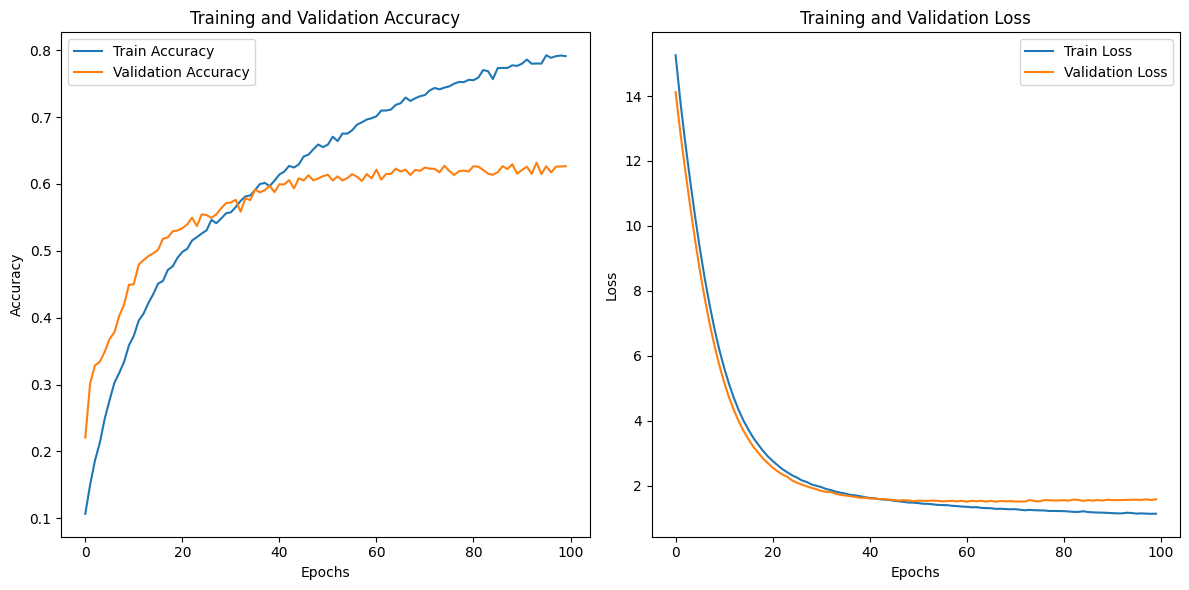

Epoch terbaik berdasarkan validation accuracy: Epoch 94


In [ ]:
import matplotlib.pyplot as plt

# Ambil riwayat metrik dari model_history
train_accuracy = model_history.history['accuracy']
train_loss = model_history.history['loss']
val_accuracy = model_history.history['val_accuracy']
val_loss = model_history.history['val_loss']

# Plot Akurasi Training dan Validation
plt.figure(figsize=(12, 6))

# Subplot untuk Akurasi
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot untuk Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Menentukan epoch terbaik berdasarkan validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1  # Tambahkan 1 karena index mulai dari 0
print(f"Epoch terbaik berdasarkan validation accuracy: Epoch {best_epoch}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Activation, BatchNormalization, Dropout, MaxPooling1D, SpatialDropout1D, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

# Layer Conv1D pertama
model.add(Conv1D(128, 8, padding='same', input_shape=(X_train_reshaped.shape[1], 1),
                 kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))  # Regularisasi L2 lebih rendah
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.4))  # Dropout lebih tinggi
model.add(MaxPooling1D(pool_size=4))

# Layer Conv1D kedua
model.add(Conv1D(256, 8, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.4))  # Dropout lebih tinggi
model.add(MaxPooling1D(pool_size=4))

# Layer Conv1D ketiga
model.add(Conv1D(128, 8, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.4))  # Dropout lebih tinggi
model.add(GlobalAveragePooling1D())

# Fully connected layer
model.add(Dense(128, kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Dropout lebih tinggi

# Output layer
model.add(Dense(15, activation='softmax'))  # Sesuaikan dengan jumlah kelas target

# Optimizer dan kompilasi
opt = Adam(learning_rate=0.001)  # Learning rate lebih tinggi
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback untuk monitoring
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Meningkatkan patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Ringkasan model
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_28 (Conv1D)                   │ (None, 141, 128)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 141, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 141, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_18                 │ (None, 141, 128)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 35, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_29 (Conv1D)                   │ (None, 35, 256)             │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 35, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 35, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_19                 │ (None, 35, 256)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 8, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_30 (Conv1D)                   │ (None, 8, 128)              │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_20                 │ (None, 8, 128)              │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_7           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_40 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │              

 Total params: 546,319 (2.08 MB)

 Trainable params: 545,295 (2.08 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
# Melatih model dengan data train dan validasi
model_history = model.fit(X_train_reshaped, y_train_encoded,
                          batch_size=32,
                          epochs=100,  # Epochs yang lebih banyak
                          validation_data=(X_test_reshaped, y_test_encoded))

Epoch 1/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 34s 104ms/step - accuracy: 0.1217 - loss: 4.2401 - val_accuracy: 0.2933 - val_loss: 3.2630
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 29s 100ms/step - accuracy: 0.2137 - loss: 3.3854 - val_accuracy: 0.3657 - val_loss: 2.8826
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 28s 97ms/step - accuracy: 0.2872 - loss: 2.9623 - val_accuracy: 0.4120 - val_loss: 2.5348
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 42s 102ms/step - accuracy: 0.3481 - loss: 2.6349 - val_accuracy: 0.4591 - val_loss: 2.2936
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.3963 - loss: 2.4116 - val_accuracy: 0.4824 - val_loss: 2.0675
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4284 - loss: 2.2446 - val_accuracy: 0.4942 - val_loss: 1.9831
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4515 - loss: 2.1335 - val_accuracy: 0.4988 - val_loss: 1.9126
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.4764 - l

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Activation, BatchNormalization, Dropout, MaxPooling1D, SpatialDropout1D, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

# Layer Conv1D pertama
model.add(Conv1D(256, 8, padding='same', input_shape=(X_train_reshaped.shape[1], 1),
                 kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))  # Meningkatkan filter
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.3))  # Dropout tetap rendah
model.add(MaxPooling1D(pool_size=2))  # Ukuran pool lebih kecil

# Layer Conv1D kedua
model.add(Conv1D(512, 8, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))  # Meningkatkan filter
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.3))  # Dropout tetap rendah
model.add(MaxPooling1D(pool_size=2))  # Ukuran pool lebih kecil

# Layer Conv1D ketiga
model.add(Conv1D(256, 8, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))  # Meningkatkan filter
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.3))  # Dropout tetap rendah
model.add(GlobalAveragePooling1D())

# Fully connected layer
model.add(Dense(256, kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))  # Menambah ukuran layer Dense
model.add(Activation('relu'))
model.add(Dropout(0.3))  # Menurunkan dropout

# Output layer
model.add(Dense(15, activation='softmax'))  # Sesuaikan dengan jumlah kelas target

# Optimizer dan kompilasi
opt = Adam(learning_rate=0.001)  # Learning rate lebih tinggi
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback untuk monitoring
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)  # Meningkatkan patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Ringkasan model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 141, 256)            │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 141, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 141, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 141, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 70, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 70, 512)             │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 70, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 70, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ (None, 70, 512)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 35, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 35, 256)             │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 35, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 35, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ (None, 35, 256)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,173,967 (8.29 MB)

 Trainable params: 2,171,919 (8.29 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
# Melatih model dengan data train dan validasi
model_history = model.fit(X_train_reshaped, y_train_encoded,
                          batch_size=32,
                          epochs=100,  # Epochs yang lebih banyak
                          validation_data=(X_test_reshaped, y_test_encoded))

Epoch 1/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 227s 778ms/step - accuracy: 0.1595 - loss: 2.9907 - val_accuracy: 0.2937 - val_loss: 2.3245
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 217s 760ms/step - accuracy: 0.2690 - loss: 2.3852 - val_accuracy: 0.3772 - val_loss: 2.0551
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 263s 765ms/step - accuracy: 0.3611 - loss: 2.1103 - val_accuracy: 0.4489 - val_loss: 1.8404
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 223s 781ms/step - accuracy: 0.4087 - loss: 1.9267 - val_accuracy: 0.4525 - val_loss: 1.8046
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 256s 761ms/step - accuracy: 0.4439 - loss: 1.8362 - val_accuracy: 0.4959 - val_loss: 1.6847
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 225s 788ms/step - accuracy: 0.4821 - loss: 1.7188 - val_accuracy: 0.5061 - val_loss: 1.6202
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 251s 751ms/step - accuracy: 0.5086 - loss: 1.6613 - val_accuracy: 0.5271 - val_loss: 1.5628
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 226s 790ms/step - accuracy: 

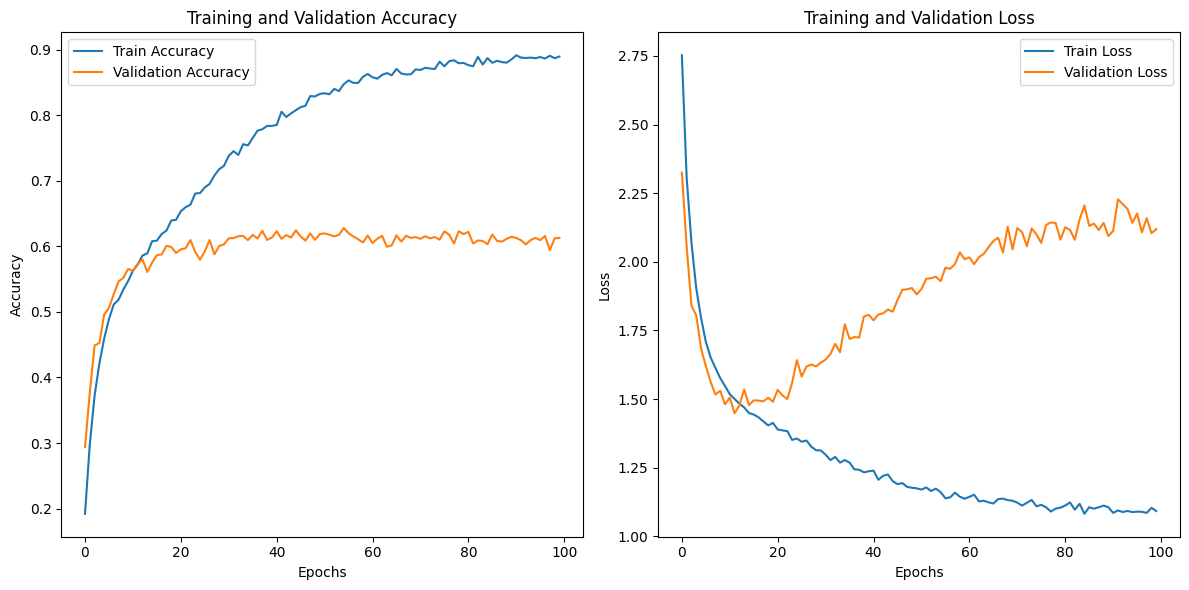

Epoch terbaik berdasarkan validation accuracy: Epoch 55


In [ ]:
import matplotlib.pyplot as plt

# Ambil riwayat metrik dari model_history
train_accuracy = model_history.history['accuracy']
train_loss = model_history.history['loss']
val_accuracy = model_history.history['val_accuracy']
val_loss = model_history.history['val_loss']

# Plot Akurasi Training dan Validation
plt.figure(figsize=(12, 6))

# Subplot untuk Akurasi
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot untuk Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Menentukan epoch terbaik berdasarkan validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1  # Tambahkan 1 karena index mulai dari 0
print(f"Epoch terbaik berdasarkan validation accuracy: Epoch {best_epoch}")


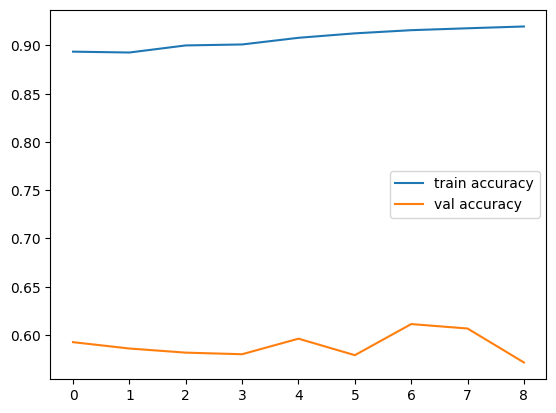

In [ ]:
# import matplotlib.pyplot as plt

# # Plot loss dan akurasi untuk pelatihan dan validasi
# plt.plot(model_history.history['accuracy'], label='train accuracy')
# plt.plot(model_history.history['val_accuracy'], label='val accuracy')
# plt.legend()
# plt.show()

# # Menyimpan model dengan akurasi validasi tertinggi
# best_epoch = model_history.history['val_accuracy'].index(max(model_history.history['val_accuracy']))
# best_weights = model.get_weights()

# # Anda bisa memuat bobot terbaik ke model jika diinginkan
# model.set_weights(best_weights)


In [ ]:
print(y_train_encoded.shape)


(9121, 15)


MFCC+Mel spectogram

In [ ]:
# import os
# import librosa
# import librosa.display
# import numpy as np
# import matplotlib.pyplot as plt

# # Path ke direktori
# path = "/content/RAV/Actor_08"

# # Mendapatkan semua file audio dalam direktori
# audio_files = [f for f in os.listdir(path) if f.endswith('.wav')]

# # Memilih salah satu file audio
# file_path = os.path.join(path, audio_files[0])


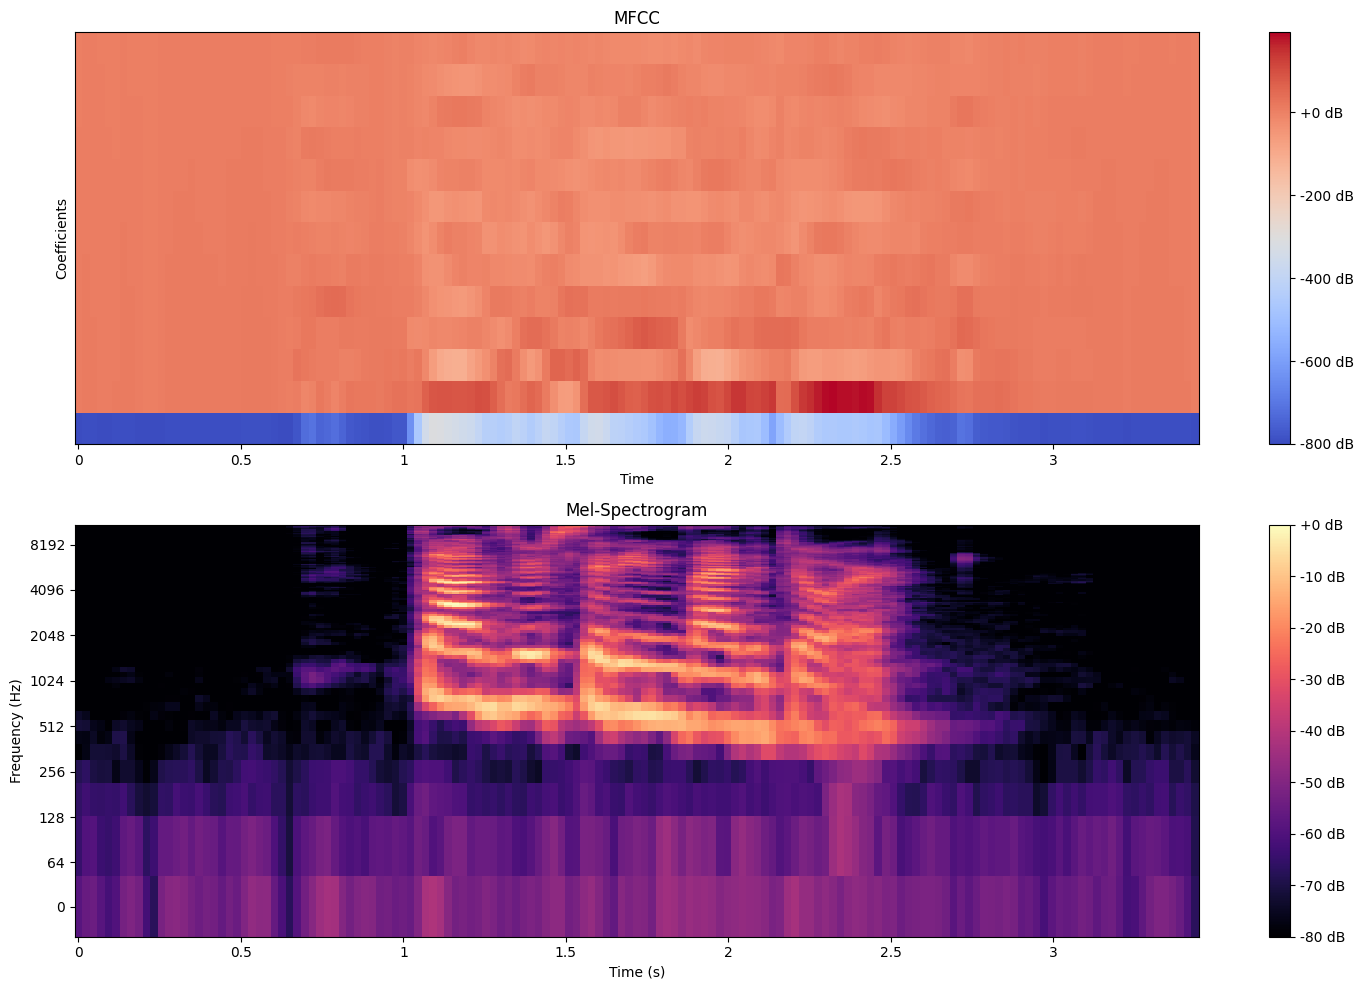

In [ ]:

# # Memuat file audio
# X, sample_rate = librosa.load(file_path, sr=22050)

# # Ekstraksi MFCC
# mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# # Ekstraksi Mel-Spectrogram
# mel_spec = librosa.feature.melspectrogram(y=X, sr=sample_rate)
# mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# # Visualisasi
# plt.figure(figsize=(15, 10))

# # Visualisasi MFCC
# plt.subplot(2, 1, 1)
# librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
# plt.colorbar(format='%+2.0f dB')
# plt.title('MFCC')
# plt.ylabel('Coefficients')

# # Visualisasi Mel-Spectrogram
# plt.subplot(2, 1, 2)
# librosa.display.specshow(mel_spec_db, sr=sample_rate, x_axis='time', y_axis='log')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel-Spectrogram')
# plt.ylabel('Frequency (Hz)')
# plt.xlabel('Time (s)')

# plt.tight_layout()
# plt.show()
